# Build a logistic regression model

### 1.1 visualization of the Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/jagad/Downloads/student_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [4]:
data.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


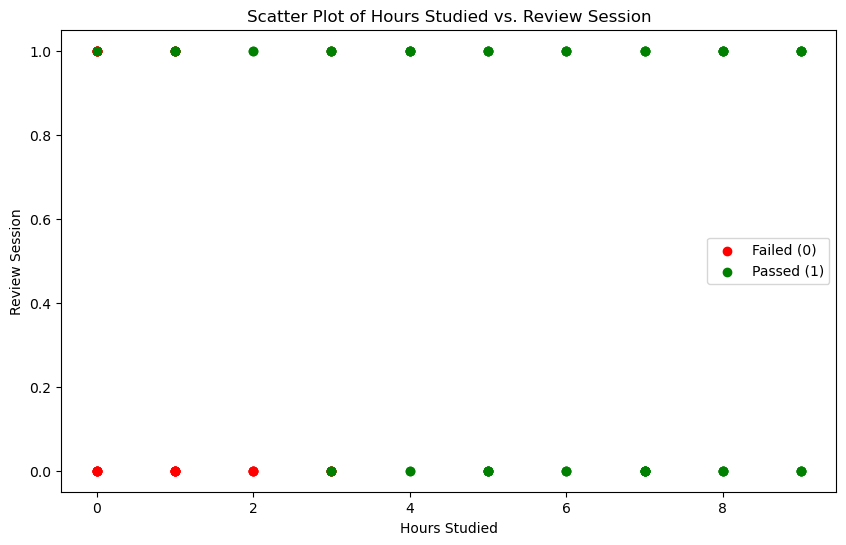

C:\Users\jagad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jagad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


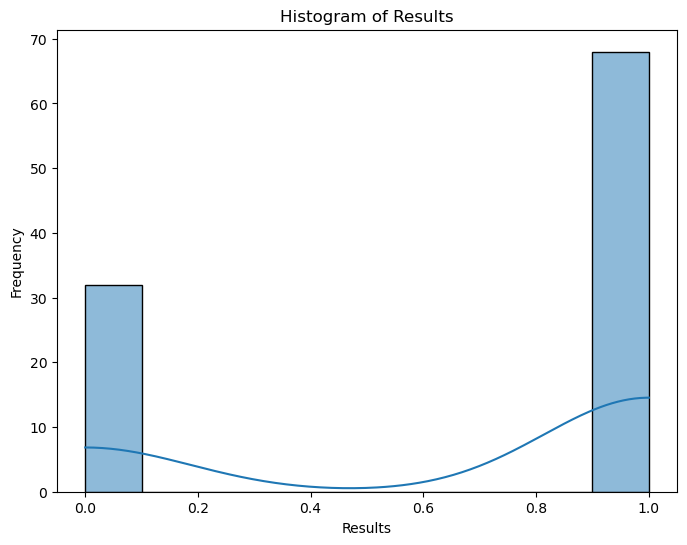

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify data types for the columns
data = data.astype({'Hours_Studied': 'int', 'Review_Session': 'int', 'Results': 'int'})

# Visualization 1: Scatter plot of Hours Studied vs Results
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Results'] == 0]['Hours_Studied'], data[data['Results'] == 0]['Review_Session'], color='red', label='Failed (0)')
plt.scatter(data[data['Results'] == 1]['Hours_Studied'], data[data['Results'] == 1]['Review_Session'], color='green', label='Passed (1)')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.legend(loc='best')
plt.title('Scatter Plot of Hours Studied vs. Review Session')
plt.show()

# Visualization 2: Histogram of Results
plt.figure(figsize=(8, 6))
sns.histplot(data['Results'], bins=10, kde=True)
plt.title("Histogram of Results")
plt.xlabel("Results")
plt.ylabel("Frequency")
plt.show()


### Visualization of the data by Using Histogram Plot

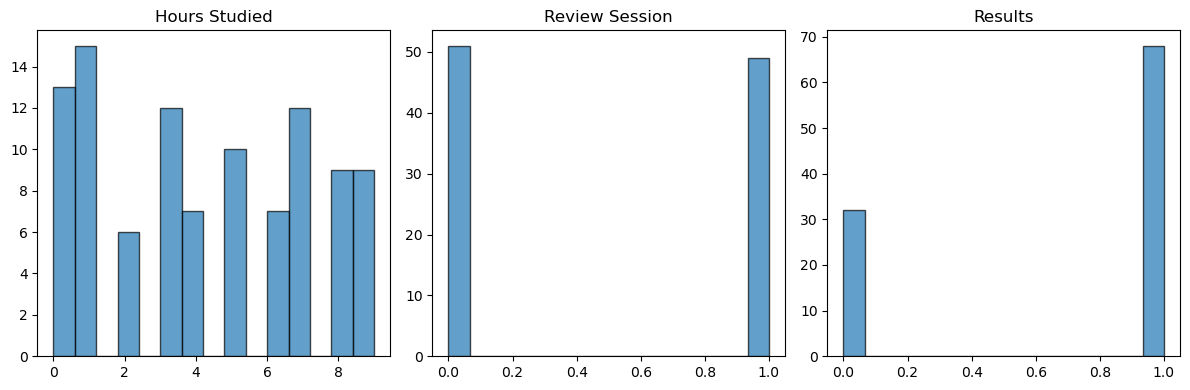

In [6]:
import matplotlib.pyplot as plt
# Create histograms for Hours_Studied, Review_Session, and Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data["Hours_Studied"], bins=15, edgecolor='k', alpha=0.7)
plt.title("Hours Studied")

plt.subplot(1, 3, 2)
plt.hist(data["Review_Session"], bins=15, edgecolor='k', alpha=0.7)
plt.title("Review Session")

plt.subplot(1, 3, 3)
plt.hist(data["Results"], bins=15, edgecolor='k', alpha=0.7)
plt.title("Results")

plt.tight_layout()
plt.show()


### Visualization of the data by Using Box Plot 

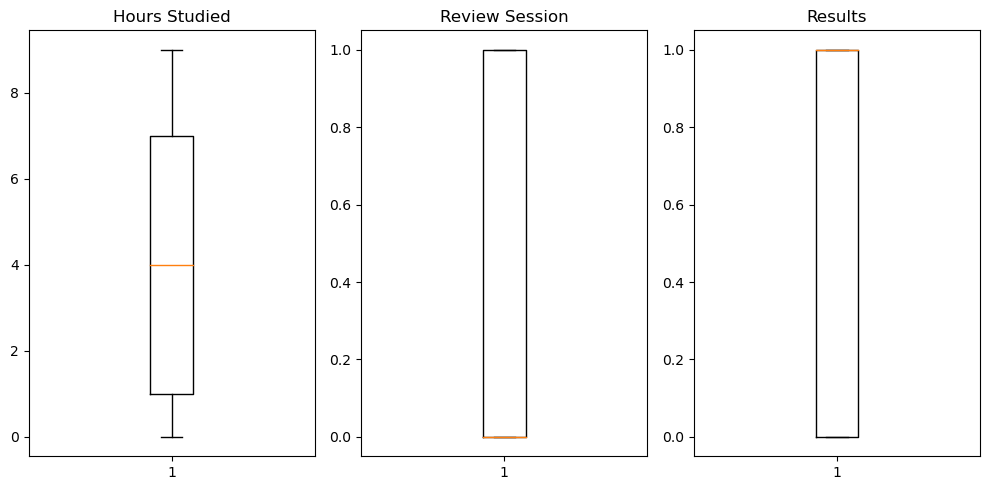

In [7]:
import matplotlib.pyplot as plt

# Create box plots for Hours_Studied, Review_Session, and Results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.boxplot(data['Hours_Studied'])
plt.title("Hours Studied")

plt.subplot(1, 3, 2)
plt.boxplot(data['Review_Session'])
plt.title("Review Session")

plt.subplot(1, 3, 3)
plt.boxplot(data['Results'])
plt.title("Results")

plt.tight_layout()
plt.show()


### Visualization of the data by Using PairPlot

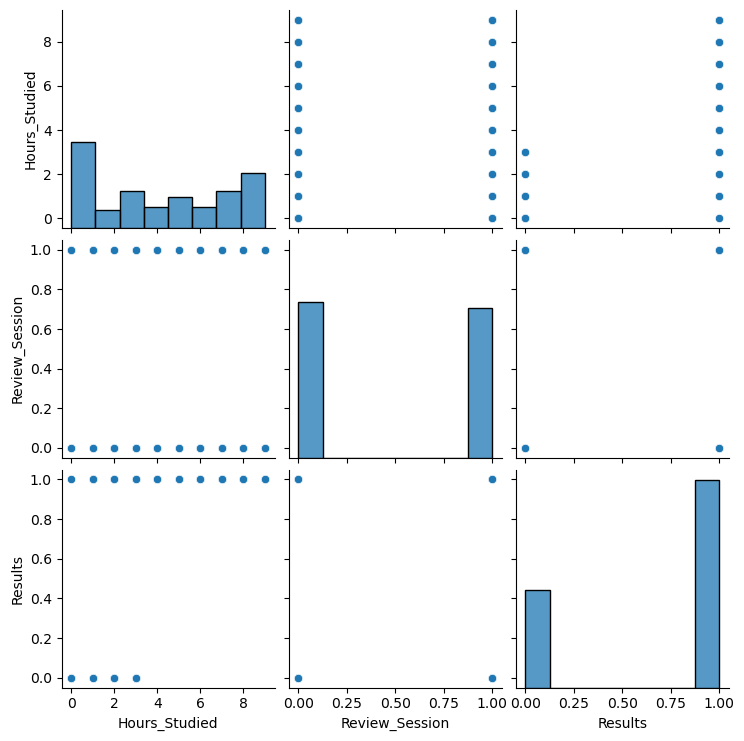

In [8]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out warnings
warnings.filterwarnings("ignore")

# Create a pairplot to visualize pairwise relationships
sns.pairplot(data, vars=["Hours_Studied", "Review_Session", "Results"])
plt.show()

### visualization of the data using Heatmap

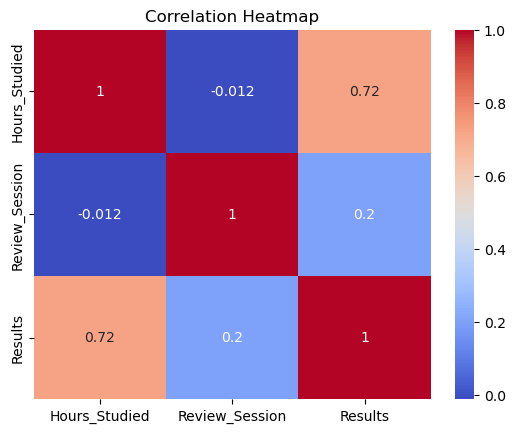

In [9]:
# Create a correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### 1.2 Logistic Regression 

In [10]:
from sklearn.linear_model import LogisticRegression
# Define the features and target
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Accuracy: 0.90


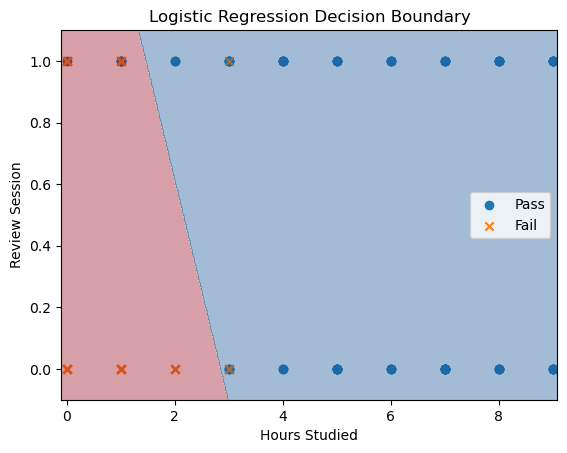

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extract the features and target
X = data[["Hours_Studied", "Review_Session"]].values
y = data["Results"].values

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a scatter plot of the data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Pass', marker='o')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Fail', marker='x')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)

# Add labels and legend
plt.xlabel("Hours Studied")
plt.ylabel("Review Session")
plt.legend(loc='best')
plt.title("Logistic Regression Decision Boundary")

# Show the plot
plt.show()


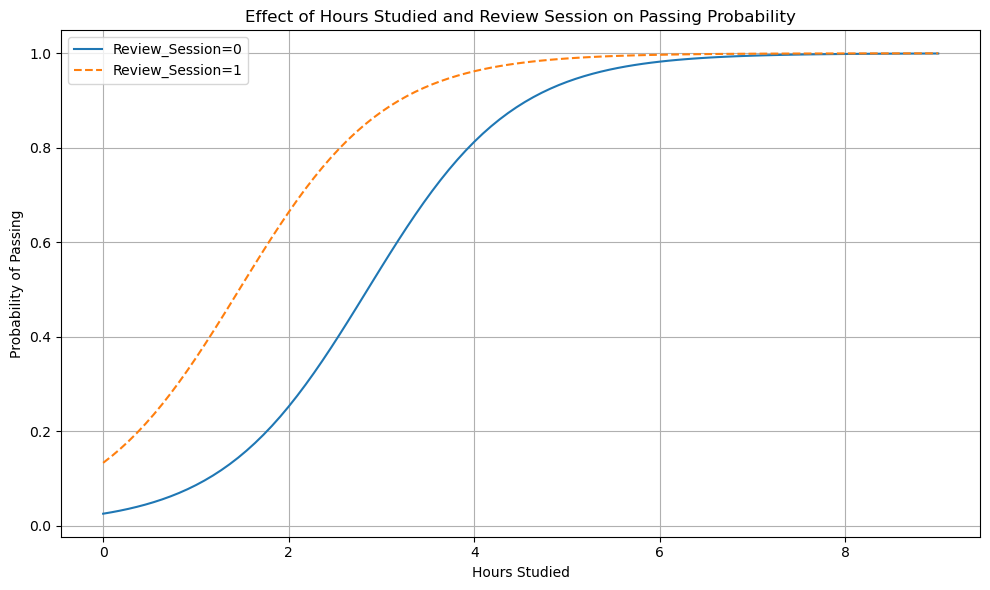

In [12]:
# Create a range of hours studied values for prediction
hours_studied_range = np.linspace(data['Hours_Studied'].min(), data['Hours_Studied'].max(), 100)

# Predict probabilities for each value in the range with both Review_Session values
# Assuming 'Review_Session' values of 0 and 1
probabilities = model.predict_proba(np.column_stack((hours_studied_range, np.zeros(100))))
probabilities_1 = model.predict_proba(np.column_stack((hours_studied_range, np.ones(100))))

# Extract probability values for each class
probability_0 = probabilities[:, 1]  # Probability of passing when Review_Session=0
probability_1 = probabilities_1[:, 1]  # Probability of passing when Review_Session=1

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hours_studied_range, probability_0, label='Review_Session=0')
plt.plot(hours_studied_range, probability_1, label='Review_Session=1', linestyle='--')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 1.3 Output model coefficients & performance metrics such as accuracy and AUC and ROC

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Coefficients: [[1.27670315 1.76574244]]
Intercept: [-3.63825693]
Accuracy: 0.9
ROC AUC Score: 0.8851102941176471


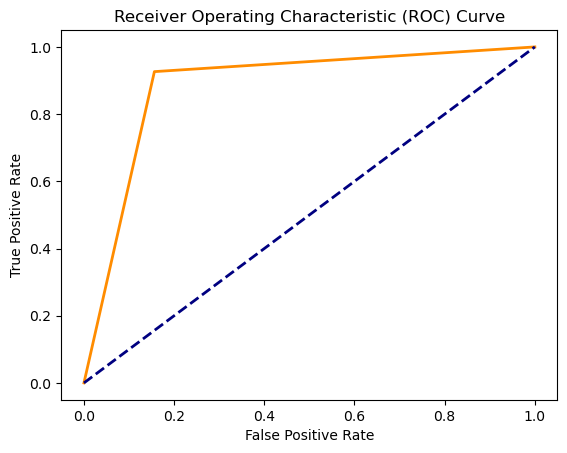

In [14]:
# Model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y, y_pred)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Understanding and Prevent Overfitting in the context of SVM

### 2.1 Support Vector Machine model using Linear kernel 

In [15]:
# Assuming you have features X and target y
X = data.drop(columns=['Results'])  # Features
y = data['Results']  # Target variable

# Split the data into training and testing sets (you can adjust the test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a Support Vector Machine model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear Kernel SVM Accuracy:", accuracy_linear)

Linear Kernel SVM Accuracy: 0.9


###  2.2 Support Vector Machine model using RBF kernel.

In [16]:
# Fit a Support Vector Machine model with an RBF kernel using Grid Search
rbf_svm = SVC(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_gamma = grid_search.best_params_['gamma']
best_c = grid_search.best_params_['C']

# Fit the RBF SVM with the best hyperparameters
best_rbf_svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
best_rbf_svm.fit(X_train, y_train)
y_pred_rbf = best_rbf_svm.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel SVM Accuracy:", accuracy_rbf)
print("Best gamma:", best_gamma)
print("Best C:", best_c)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.